In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [4]:
covid_df=pd.read_csv("covid_19_india.csv")

In [5]:
covid_df.head(1)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0


In [6]:
covid_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       15086 non-null  float64
 1   Date                      15086 non-null  object 
 2   Time                      15086 non-null  object 
 3   State/UnionTerritory      15086 non-null  object 
 4   ConfirmedIndianNational   15086 non-null  object 
 5   ConfirmedForeignNational  15086 non-null  object 
 6   Cured                     15086 non-null  float64
 7   Deaths                    15086 non-null  float64
 8   Confirmed                 15086 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [7]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,15086.000000,1.508600e+04,15086.000000,1.508600e+04
mean,7543.500000,1.747937e+05,2721.084449,1.942820e+05
std,4355.097416,3.648330e+05,7182.672358,4.095184e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3772.250000,1.685000e+03,12.000000,2.935500e+03
50%,7543.500000,1.964700e+04,364.000000,2.608150e+04
75%,11314.750000,2.087552e+05,2170.000000,2.216012e+05
max,15086.000000,4.927480e+06,83777.000000,5.433506e+06


In [8]:
vaccine_df=pd.read_csv("covid_vaccine_statewise.csv")

In [9]:
vaccine_df

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
covid_df.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"],inplace=True,axis=1)

In [11]:
covid_df.head(1)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0


In [12]:
covid_df["Date"]=pd.to_datetime(covid_df["Date"] ,format='%Y-%m-%d')

In [13]:
covid_df.head(1)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0


In [14]:
#finding active cases

In [15]:
covid_df["Active_Cases"]=covid_df['Confirmed'] - (covid_df['Cured'] +covid_df['Deaths'])

In [16]:
covid_df.tail(7)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
15107,NaT,NaN,NaN,NaN,NaN,NaN
15108,NaT,NaN,NaN,NaN,NaN,NaN
15109,NaT,NaN,NaN,NaN,NaN,NaN
15110,NaT,NaN,NaN,NaN,NaN,NaN
15111,NaT,NaN,NaN,NaN,NaN,NaN
15112,NaT,NaN,NaN,NaN,NaN,NaN
15113,NaT,NaN,NaN,NaN,NaN,NaN


In [17]:
statewise=pd.pivot_table(covid_df,values=["Confirmed","Deaths","Cured"],index="State/UnionTerritory",aggfunc = max)

In [18]:
statewise

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,6674.0,6359.0,92.0
Andhra Pradesh,1475372.0,1254291.0,9580.0
Arunachal Pradesh,22462.0,19977.0,88.0
Assam,340858.0,290774.0,2344.0
Bihar,664115.0,595377.0,4039.0
Cases being reassigned to states,9265.0,0.0,0.0
Chandigarh,56513.0,48831.0,647.0
Chhattisgarh,925531.0,823113.0,12036.0
Dadra and Nagar Haveli and Daman and Diu,9652.0,8944.0,4.0


In [19]:
statewise["Recovery Rate"]=statewise["Cured"]*100/statewise["Confirmed"]

In [20]:
statewise.head(3)

,Confirmed,Cured,Deaths,Recovery Rate
State/UnionTerritory,,,,
Andaman and Nicobar Islands,6674.0,6359.0,92.0,95.280192
Andhra Pradesh,1475372.0,1254291.0,9580.0,85.015237
Arunachal Pradesh,22462.0,19977.0,88.0,88.936871


In [21]:
statewise["Mortality Rate"]=statewise["Deaths"]*100/statewise["Confirmed"]

In [22]:
statewise.head(1)

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,6674.0,6359.0,92.0,95.280192,1.378484


In [23]:
statewise=statewise.sort_values(by = "Confirmed" , ascending=False)

In [24]:
statewise.head(5)

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,5433506.0,4927480.0,83777.0,90.686934,1.541859
Karnataka,2272374.0,1674487.0,22838.0,73.688882,1.005028
Kerala,2200706.0,1846105.0,6612.0,83.886944,0.300449
Tamil Nadu,1664350.0,1403052.0,18369.0,84.300297,1.103674
Uttar Pradesh,1637663.0,1483249.0,18072.0,90.571076,1.103524


In [25]:
statewise.style.background_gradient(cmap ="cubehelix")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,5433506.000000,4927480.000000,83777.000000,90.686934,1.541859
Karnataka,2272374.000000,1674487.000000,22838.000000,73.688882,1.005028
Kerala,2200706.000000,1846105.000000,6612.000000,83.886944,0.300449
Tamil Nadu,1664350.000000,1403052.000000,18369.000000,84.300297,1.103674
Uttar Pradesh,1637663.000000,1483249.000000,18072.000000,90.571076,1.103524
Andhra Pradesh,1475372.000000,1254291.000000,9580.000000,85.015237,0.649328
Delhi,1402873.000000,1329899.000000,22111.000000,94.798246,1.576123
West Bengal,1171861.000000,1026492.000000,13576.000000,87.595030,1.158499
Chhattisgarh,925531.000000,823113.000000,12036.000000,88.934136,1.300443


In [26]:
#top 10 active cases states

In [27]:
Top_Active=covid_df.groupby(by= "State/UnionTerritory").max()[['Active_Cases','Date']].sort_values(by = ["Active_Cases"],ascending=False).reset_index()

In [28]:
Top_Active

,State/UnionTerritory,Active_Cases,Date
0,Maharashtra,701614.0,2021-05-19
1,Karnataka,605515.0,2021-05-19
2,Kerala,445692.0,2021-05-19
3,Uttar Pradesh,310783.0,2021-05-19
4,Tamil Nadu,242929.0,2021-05-19
5,Rajasthan,212753.0,2021-05-19
6,Andhra Pradesh,211554.0,2021-05-19
7,Gujarat,148297.0,2021-05-19
8,West Bengal,131948.0,2021-05-19
9,Chhattisgarh,131245.0,2021-05-19


In [29]:
fig=plt.figure(figsize=(16,9))

<Figure size 1600x900 with 0 Axes>

Text(0.5, 1.0, 'Top 10 States with most active cases in india')

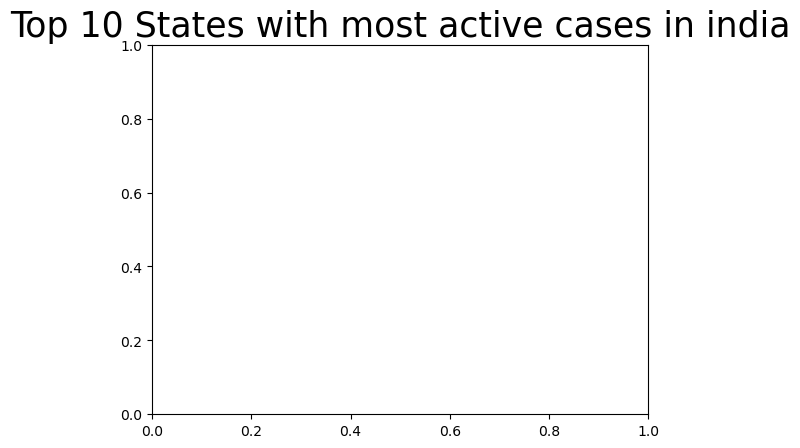

In [30]:
plt.title("Top 10 States with most active cases in india",size=25)

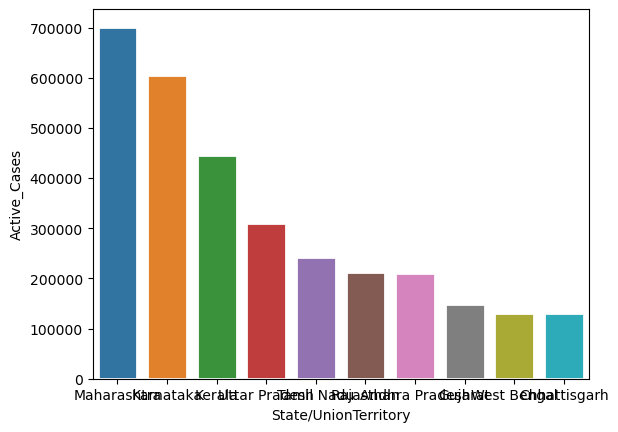

In [31]:

ax=sns.barplot(data=Top_Active.iloc[:10],y="Active_Cases",x="State/UnionTerritory",linewidth=2,edgecolor="white")

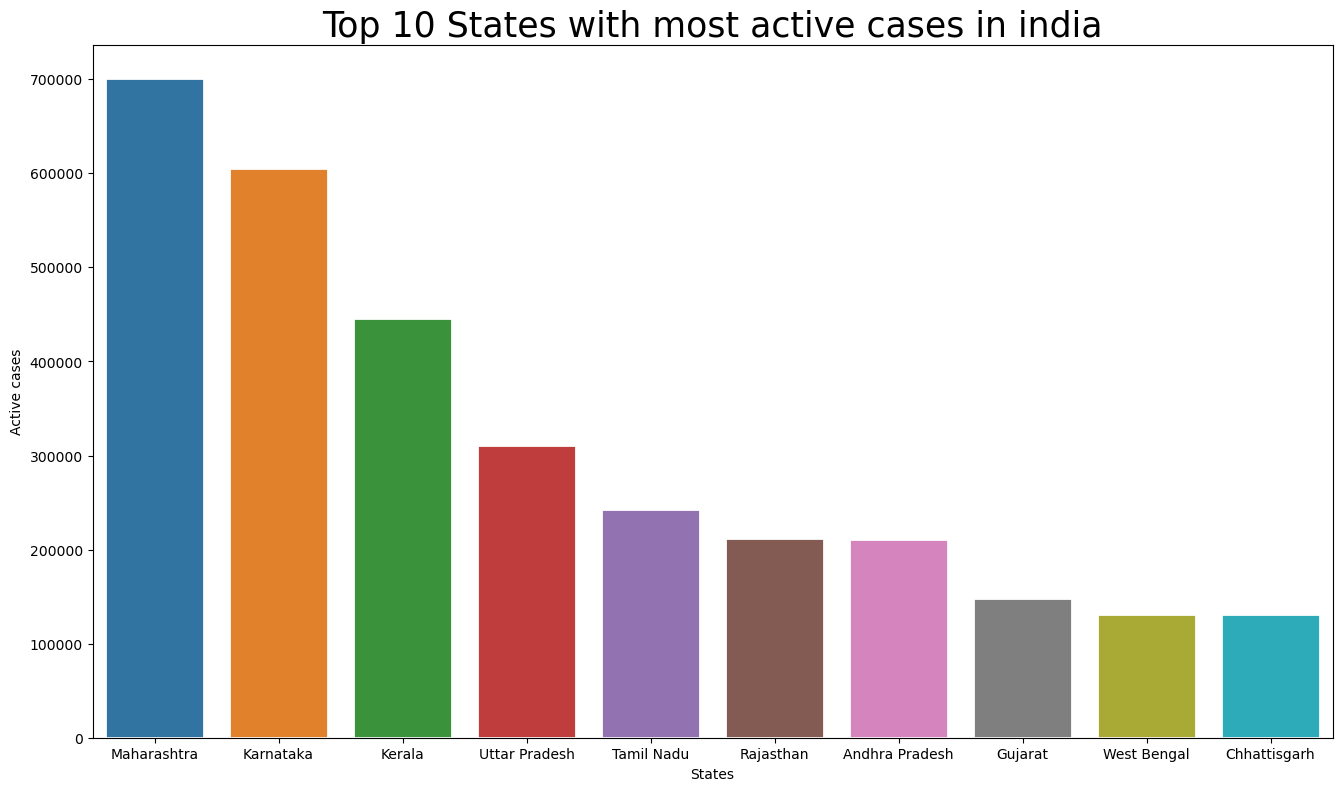

In [32]:
fig=plt.figure(figsize=(16,9))
plt.title("Top 10 States with most active cases in india",size=25)

ax=sns.barplot(data=Top_Active.iloc[:10],
               y="Active_Cases",
               x="State/UnionTerritory",
               linewidth=2,
               edgecolor="white")
plt.xlabel("States")
plt.ylabel("Active cases")
plt.show()

In [33]:
top10deaths=covid_df.groupby(by = "State/UnionTerritory").max()[["Deaths","Date"]].sort_values(by =["Deaths"],ascending=False)

In [34]:
#top states with highest deaths

ValueError: Could not interpret input 'State/UnionTerritory'

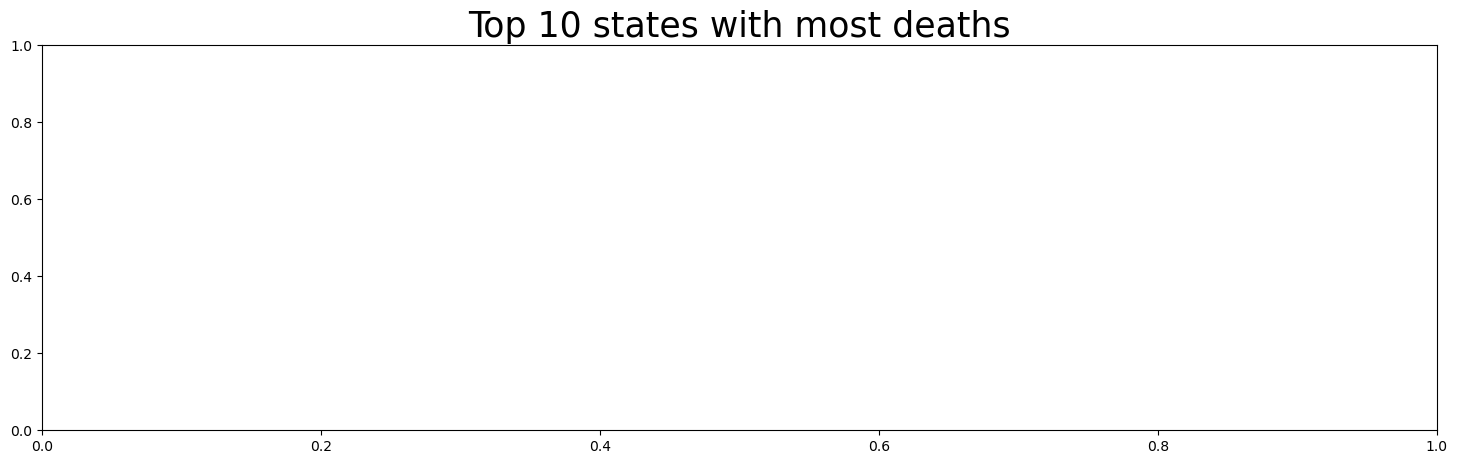

In [35]:
fig=plt.figure(figsize=(18,5))
plt.title("Top 10 states with most deaths",size=25)
ax=sns.barplot(data=top10deaths.iloc[:12],
               y="Deaths",
               x="State/UnionTerritory",
               linewidth=2,
               edgecolor="White")
plt.xlabel("States")
plt.ylabel("Total Death Cases")
plt.show()

Deaths           float64
Date      datetime64[ns]
dtype: object


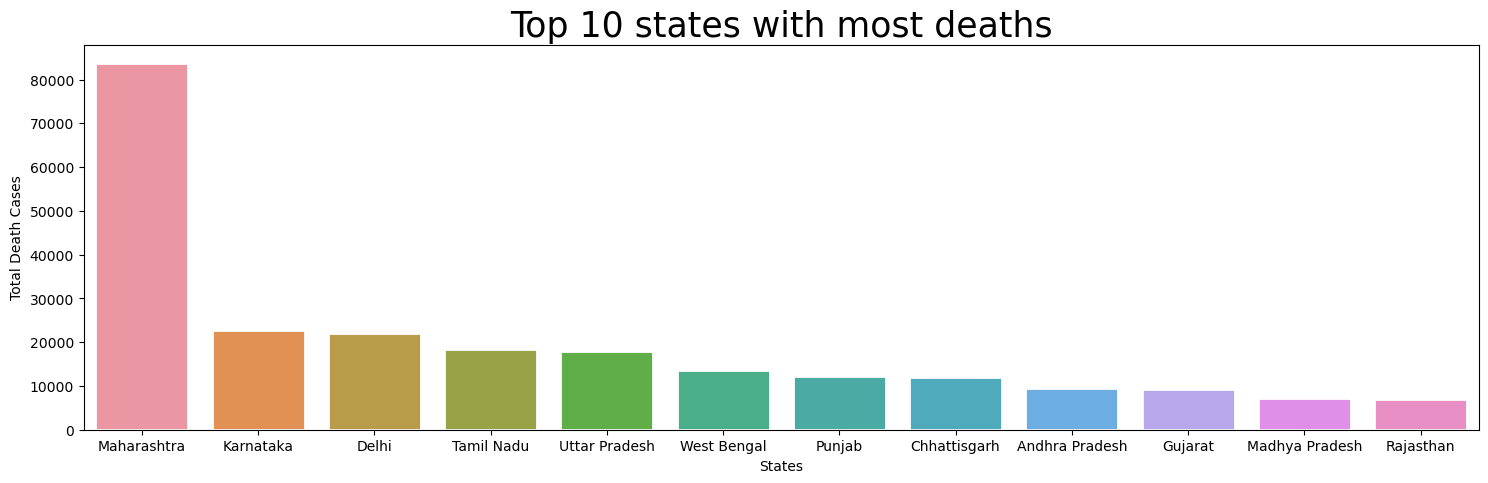

In [36]:
# Check the column names and data types
print(top10deaths.dtypes)

# Plot the bar chart
fig = plt.figure(figsize=(18, 5))
plt.title("Top 10 states with most deaths", size=25)
ax = sns.barplot(x=top10deaths.index[:12],  # Using the index as x values
                 y=top10deaths["Deaths"].iloc[:12],
                 linewidth=2,
                 edgecolor="white")
plt.xlabel("States")
plt.ylabel("Total Death Cases")
plt.show()


In [ ]:
#growth trend

In [39]:
Top_Active['Date'] = pd.to_datetime(Top_Active['Date'])

fig=plt.figure(figsize=(12,6))
ax=sns.lineplot(x=Top_Active,y=Top_Active.Active_Cases)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

<Figure size 1200x600 with 0 Axes>

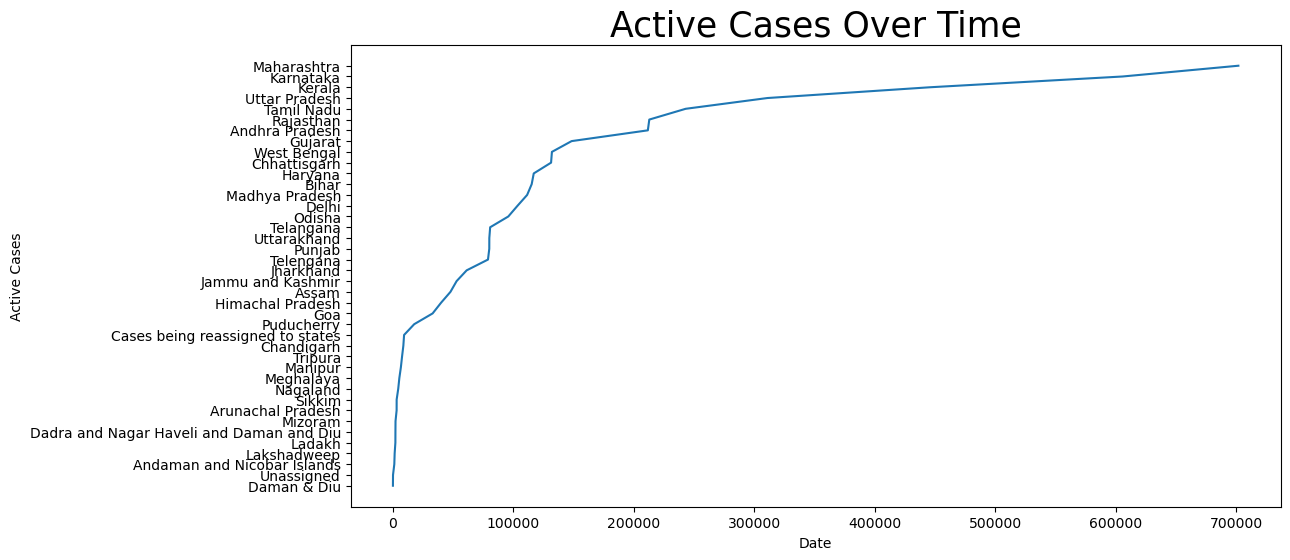

In [44]:
Top_Active['Date'] = pd.to_datetime(Top_Active['Date'])

fig = plt.figure(figsize=(12, 6))
ax = sns.lineplot(y='State/UnionTerritory', x='Active_Cases', data=Top_Active)
plt.title("Active Cases Over Time", size=25)
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.show()


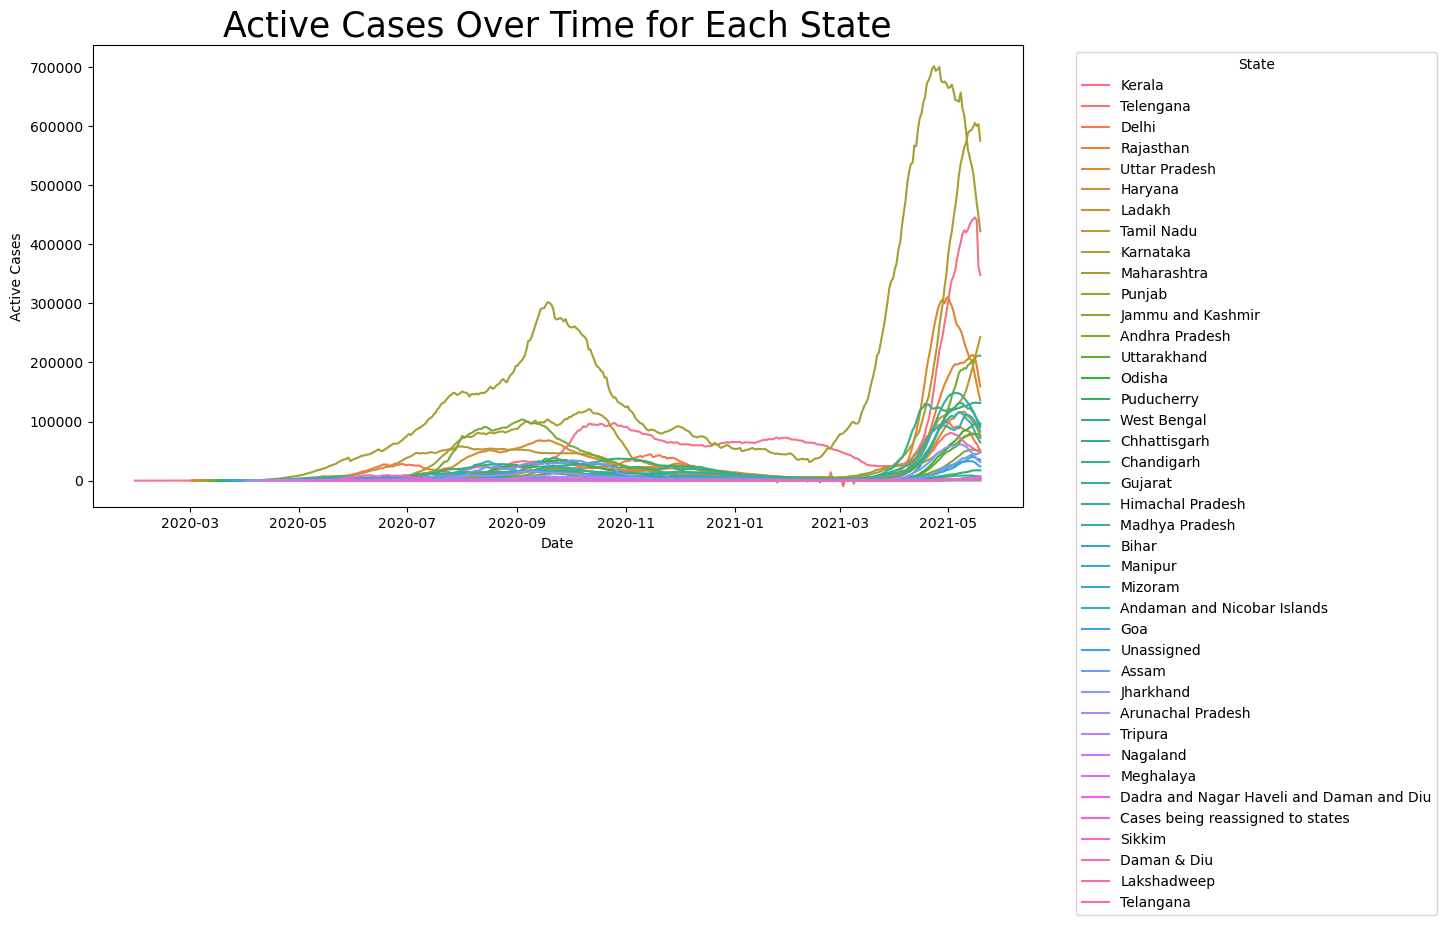

In [45]:
# Assuming your data is in a DataFrame named 'covid_df' with columns 'Date', 'State/UnionTerritory', and 'Active_Cases'
covid_df['Date'] = pd.to_datetime(covid_df['Date'])

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='Date', y='Active_Cases', hue='State/UnionTerritory', data=covid_df, ax=ax)
plt.title("Active Cases Over Time for Each State", size=25)
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()


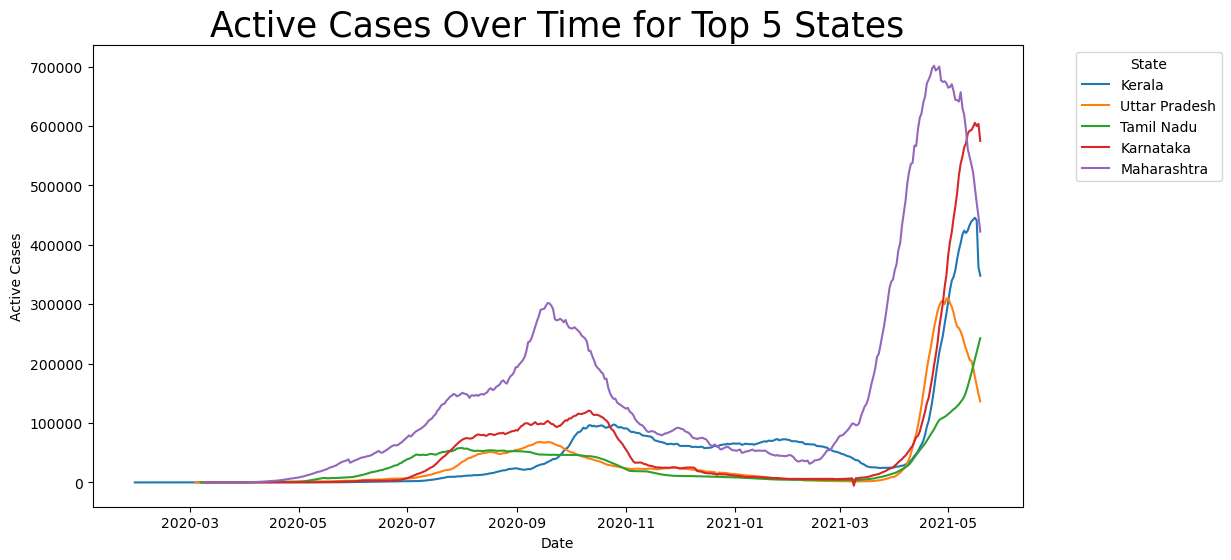

In [46]:
# Assuming your data is in a DataFrame named 'covid_df' with columns 'Date', 'State/UnionTerritory', and 'Active_Cases'
covid_df['Date'] = pd.to_datetime(covid_df['Date'])

# Find the top 5 states by total active cases
top_states = covid_df.groupby('State/UnionTerritory')['Active_Cases'].max().sort_values(ascending=False).head(5).index

# Filter the data for the top 5 states
top_states_data = covid_df[covid_df['State/UnionTerritory'].isin(top_states)]

# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='Date', y='Active_Cases', hue='State/UnionTerritory', data=top_states_data, ax=ax)
plt.title("Active Cases Over Time for Top 5 States", size=25)
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()


In [47]:
vaccine_df

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
vaccine_df.rename(columns={"Updated On":"Vaccine_Date"},inplace=True)

In [54]:
vaccine_df.head(1)

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0


In [55]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [56]:
vaccine_df.isnull().sum()

Vaccine_Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [57]:
vaccination=vaccine_df.drop(columns=["Sputnik V (Doses Administered)","AEFI","18-44 Years (Doses Administered)","45-60 Years (Doses Administered)","60+ Years (Doses Administered)"])

In [59]:
vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [60]:
#male and female vaccination pie plot

In [63]:
male=vaccination["Male(Individuals Vaccinated)"].sum()
female=vaccination["Female(Individuals Vaccinated)"].sum()

px.pie(names=["Male","Female"],values=[male,female],title="Male and Female Vaccination")

In [64]:
#remove rows where state=india

In [66]:
vaccine = vaccine_df[vaccine_df.State!='India']

In [67]:
vaccine

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
vaccine.rename(columns={"Total Individuals Vaccinated":"Total"},inplace=True)

C:\Users\Nasar\AppData\Local\Temp\ipykernel_10040\1825276777.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
vaccine

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# most vaccinated state

In [73]:
vac_max=vaccine.groupby("State")["Total"].sum().to_frame('Total')
vac_max=vac_max.sort_values('Total',ascending=False)[:5]

In [74]:
vac_max

,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


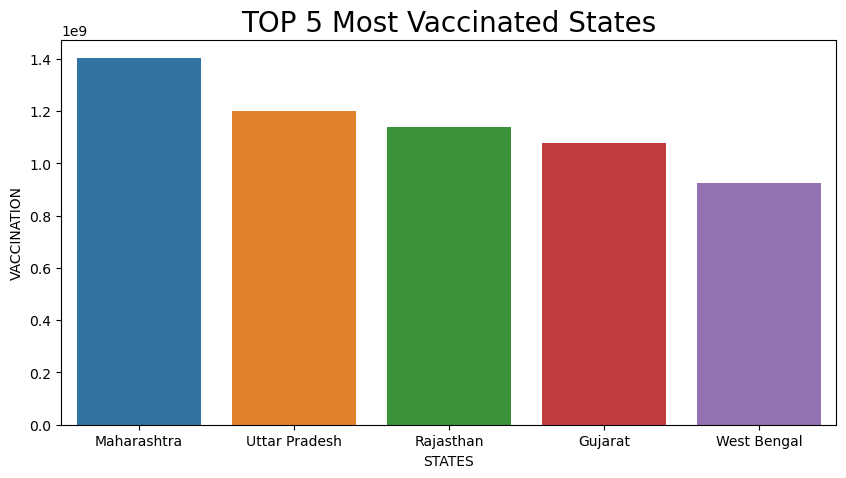

In [81]:
fig=plt.figure(figsize=(10,5))
plt.title("TOP 5 Most Vaccinated States",size=20)
x=sns.barplot(data=vac_max.iloc[:10],x = vac_max.index,y=vac_max.Total)
plt.xlabel("STATES")
plt.ylabel("VACCINATION")
plt.show()

In [83]:
vac_min=vaccine.groupby("State")["Total"].sum().to_frame('Total')
vac_min=vac_min.sort_values('Total',ascending=True)[:5]
vac_min

,Total
State,
Lakshadweep,2124715.0
Andaman and Nicobar Islands,8102125.0
Ladakh,9466289.0
Dadra and Nagar Haveli and Daman and Diu,11358600.0
Sikkim,16136752.0


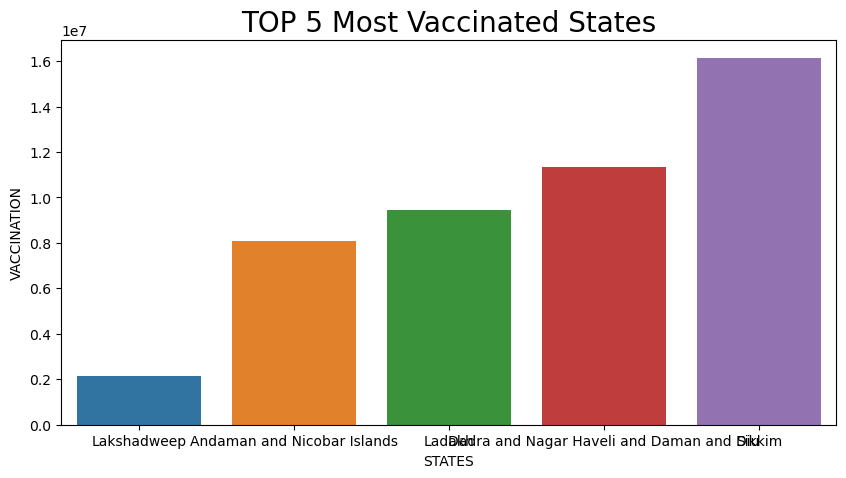

In [84]:
fig=plt.figure(figsize=(10,5))
plt.title("TOP 5 Most Vaccinated States",size=20)
x=sns.barplot(data=vac_min.iloc[:10],x = vac_min.index,y=vac_min.Total)
plt.xlabel("STATES")
plt.ylabel("VACCINATION")
plt.show()